In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Student Mental health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Data Preprocessing

1. Rename column name
2. Handle missing value
3. Format the values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [4]:
# 1. Rename
data.columns = ['Timestamp', 'Gender', 'Age', 'Major', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']

In [5]:
# 2. Drop Na
data.dropna(inplace=True)
data.drop('Timestamp', axis=1, inplace=True)
data.isnull().sum()

Gender            0
Age               0
Major             0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Treatment         0
dtype: int64

In [6]:
# Format the values - Major
sorted(data['Major'].unique())

['ALA',
 'Accounting ',
 'BCS',
 'BENL',
 'BIT',
 'Banking Studies',
 'Benl',
 'Biomedical science',
 'Biotechnology',
 'Business Administration',
 'CTS',
 'Communication ',
 'DIPLOMA TESL',
 'Diploma Nursing',
 'ENM',
 'Econs',
 'Engine',
 'Engineering',
 'Fiqh',
 'Fiqh fatwa ',
 'Human Resources',
 'Human Sciences ',
 'IT',
 'Irkhs',
 'Islamic Education',
 'Islamic education',
 'KENMS',
 'KIRKHS',
 'KOE',
 'Kirkhs',
 'Koe',
 'Kop',
 'Law',
 'Laws',
 'MHSC',
 'Malcom',
 'Marine science',
 'Mathemathics',
 'Nursing ',
 'Pendidikan Islam',
 'Pendidikan Islam ',
 'Pendidikan islam',
 'Psychology',
 'Radiography',
 'TAASL',
 'Usuluddin ',
 'engin',
 'koe',
 'psychology']

In [7]:
data['Major'] = data['Major'].apply(lambda x: x.strip())
data['Major'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 
                        'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'KOE': 'Koe', 'koe': 'Koe', 
                        'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa': 'Fiqh', 'Laws': 'Law', 
                        'DIPLOMA TESL': 'Diploma TESL'} , inplace = True)

In [8]:
# Format the values - Year
# Only keep the number of year for better discovery
data["Year"] = data["Year"].apply(lambda x: int(x[-1]))

In [9]:
# Format the values - CGPA
data["CGPA"] = data["CGPA"].apply(lambda x: x.strip())


In [10]:
data.head()

,Gender,Age,Major,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


### Data Exploration

1. Explore the course attribute
2. Explore evaluation attributes(Depression, Anxiety, Panic_Attack)

#### What is the number of students in different years and major?

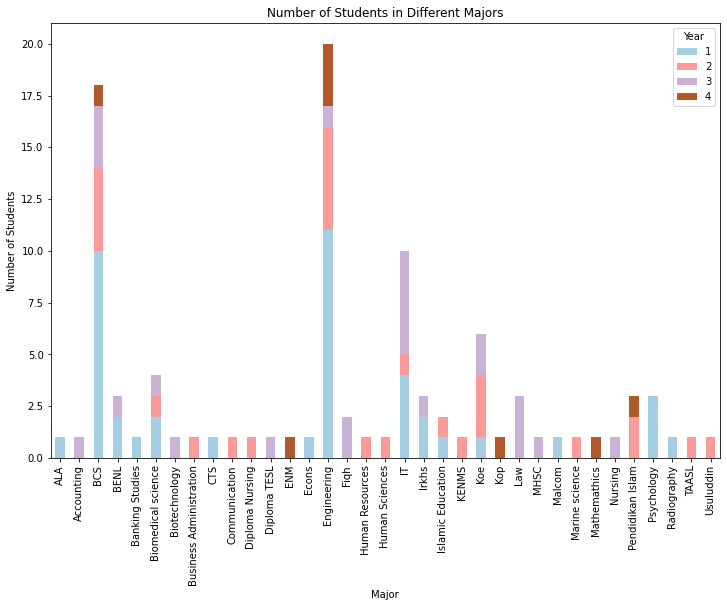

In [11]:
df_plot = data.groupby(['Major', 'Year']).size().reset_index().pivot(columns='Year', index='Major', values=0)
df_plot.fillna(0)

df_plot.plot.bar(stacked=True, figsize=(12,8), title='Number of Students in Different Majors',ylabel='Number of Students', colormap="Paired")
plt.savefig('Students_in_Majors.svg')

#### How does the mental health of male and female differ under different majors?

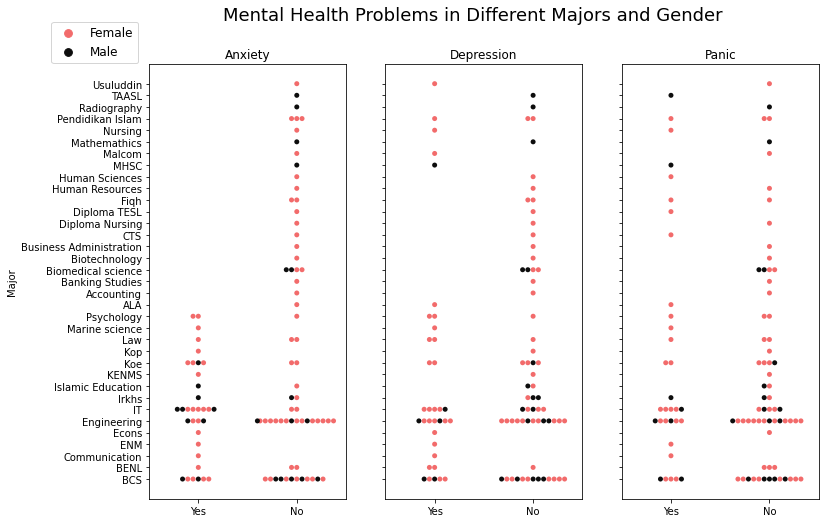

In [12]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 8))

sns.swarmplot(ax=axes[0], x = 'Anxiety', y = 'Major', hue = 'Gender', order = ['Yes', 'No'], data = data, palette = ['#F26B6B', '#0D0D0D'])
axes[0].set_title('Anxiety')
axes[0].set(xlabel=None)
axes[0].legend(loc=1, bbox_to_anchor=[-0.05,1.1], borderaxespad=0.1, fontsize=12)

sns.swarmplot(ax=axes[1], x = 'Depression', y = 'Major', hue = 'Gender', data = data, palette = ['#F26B6B', '#0D0D0D'])
axes[1].set_title('Depression')
axes[1].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].legend_.remove()

sns.swarmplot(ax=axes[2], x = 'Panic_Attack', y = 'Major', hue = 'Gender', data = data, palette = ['#F26B6B', '#0D0D0D'])
axes[2].set_title('Panic')
axes[2].set(ylabel=None)
axes[2].set(xlabel=None)
axes[2].legend_.remove()

fig.suptitle('Mental Health Problems in Different Majors and Gender', fontsize=18)
plt.savefig('Mental_in_Majors_and_Gender.svg')

#### How does the mental health differ by age?

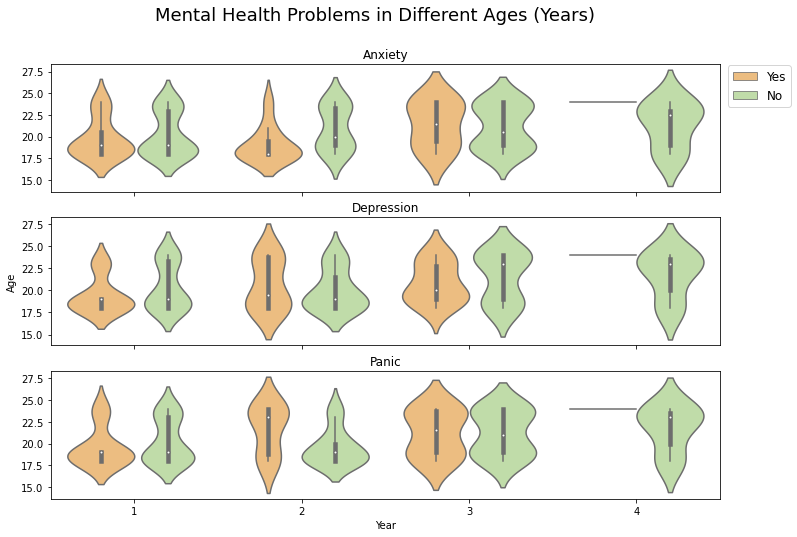

In [13]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))

sns.violinplot(ax=axes[0], x = 'Year', y = 'Age', hue = 'Anxiety', hue_order=['Yes', 'No'], data = data, palette = 'Spectral')
axes[0].set_title('Anxiety')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[0].legend(loc=2, bbox_to_anchor=[1.01,1.0], borderaxespad=0.1, fontsize=12)

sns.violinplot(ax=axes[1], x = 'Year', y = 'Age', hue = 'Depression', data = data, palette = 'Spectral')
axes[1].set_title('Depression')
axes[1].set(xlabel=None)
axes[1].legend_.remove()

sns.violinplot(ax=axes[2], x = 'Year', y = 'Age', hue = 'Panic_Attack', data = data, palette = 'Spectral')
axes[2].set_title('Panic')
axes[2].set(ylabel=None)
axes[2].legend_.remove()

fig.suptitle('Mental Health Problems in Different Ages (Years)', fontsize=18)
plt.savefig('Mental_in_Ages.svg')

#### Does CGPA affect the mental health?

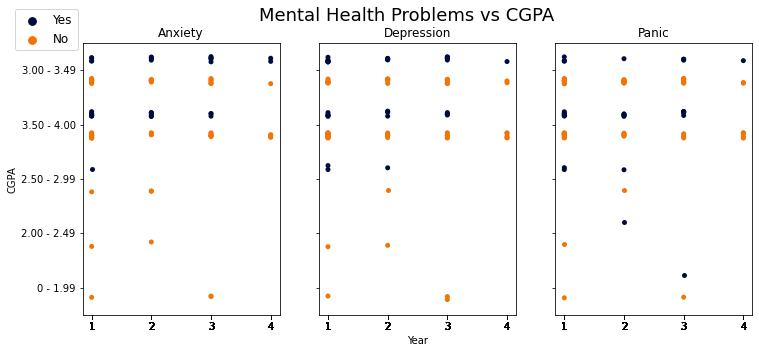

In [14]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

plt.setp(axes, xticks=data.Year)

sns.stripplot(ax=axes[0], x = 'Year', y = 'CGPA', hue = 'Anxiety', hue_order=['Yes', 'No'], data = data, 
              dodge=True, palette = ['#010B40', '#F27405'])
axes[0].set_title('Anxiety')
axes[0].set(xlabel=None)
axes[0].legend(loc=2, bbox_to_anchor=[-0.35,1.13], borderaxespad=0.1, fontsize=12)

sns.stripplot(ax=axes[1], x = 'Year', y = 'CGPA', hue = 'Depression', data = data, dodge=True, palette = ['#010B40', '#F27405'])
axes[1].set_title('Depression')
axes[1].set(ylabel=None)
axes[1].legend_.remove()

sns.stripplot(ax=axes[2], x = 'Year', y = 'CGPA', hue = 'Panic_Attack', data = data, dodge=True, palette = ['#010B40', '#F27405'])
axes[2].set_title('Panic')
axes[2].set(xlabel=None, ylabel=None)
axes[2].legend_.remove()

fig.suptitle('Mental Health Problems vs CGPA', fontsize=18)
plt.savefig('Mental_vs_GPA.svg')